In [1]:
from collections import Counter
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import RidgeCV  #using the cross validation
from sklearn.linear_model import LassoCV #using the cross validation
from xgboost import XGBRegressor #using the cross validation
import warnings
warnings.filterwarnings("ignore")


# DATA PREPROCESSING

In [2]:
path='test_vicky_eter_data_with 5-7 ISCED.csv'
df = pd.read_csv(path ,sep = ',') 

In [3]:
#standatize the name of columns
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')
df.columns = df.columns.str.replace('/', '_')
df.columns = df.columns.str.replace('(', '')
df.columns = df.columns.str.replace(')', '')
df.columns = df.columns.str.replace(',', '')   

In [4]:
col=list(df.columns)

In [5]:
len(df)

14316

In [6]:
###remove the Not Applicable Values from de variables
for i in col:
    df=df.loc[df[i] != 'a']
df=df.reset_index(drop=True)

In [7]:
#Check completeness

def completeness(L,df):
    missing=['a','m','x','xc','xr','c','s','nc','information missing']
    lengths={}
    col=list(df.columns)
    for i in col:
        df_1=df.loc[df[i].isin(missing)]
        lengths[i]=((1-(len(df_1)/L))*100)
        
    return lengths

completeness(len(df),df)

{'Country_Code': 100.0,
 'Institution_Category_standardized': 100.0,
 'Foundation_year': 99.9913926665519,
 'Total_academic_staff_HC': 64.22792218970564,
 'Highest_degree_delivered': 88.42313651230849,
 'Students_enrolled_at_ISCED_5_7___foreigner': 66.65519022206921,
 'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities': 76.61387502151833,
 'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction': 76.69134102255121,
 'Total_students_enrolled_ISCED_5_7': 87.6226545016354,
 'Graduates_at_ISCED_5_7___men': 78.05129970735067,
 'Graduates_at_ISCED_5_7___women': 78.39559304527457,
 'Student_fees_funding___Total_current_revenues': 45.32621793768291,
 'Erasmus_total_incoming_students': 100.0,
 'Erasmus_total_outgoing_students': 100.0}

# Statistics

In [8]:
def Histogram_Missing(column,df):
    missing=['a','m','x','xc','xr','c','s','nc','information missing']
    df_mis=df.loc[df[column].isin(missing)]
    return list(df_mis[column])

Text(0.5, 1.0, 'Foundation_year')

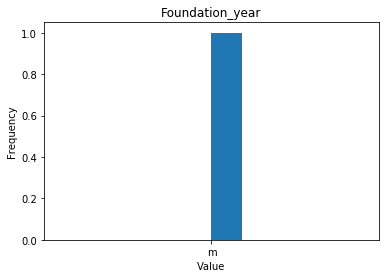

In [9]:
columna='Foundation_year'
miss_fy=Histogram_Missing(columna,df)
plt.hist(miss_fy)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Total_academic_staff_HC')

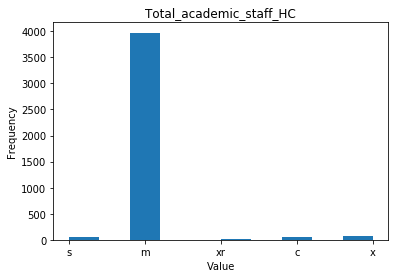

In [10]:
columna='Total_academic_staff_HC'
miss_tashc=Histogram_Missing(columna,df)
plt.hist(miss_tashc)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Highest_degree_delivered')

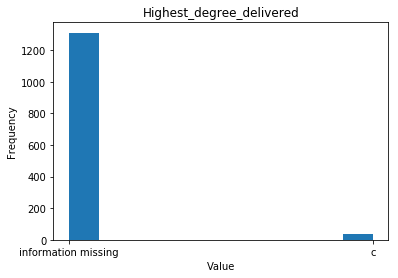

In [11]:
columna='Highest_degree_delivered'
miss_hdd=Histogram_Missing(columna,df)
plt.hist(miss_hdd)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Students_enrolled_at_ISCED_5_7___foreigner')

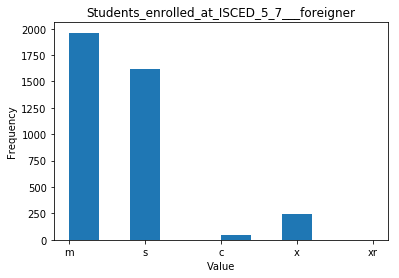

In [12]:
columna='Students_enrolled_at_ISCED_5_7___foreigner'
miss_se57f=Histogram_Missing(columna,df)
plt.hist(miss_se57f)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities')

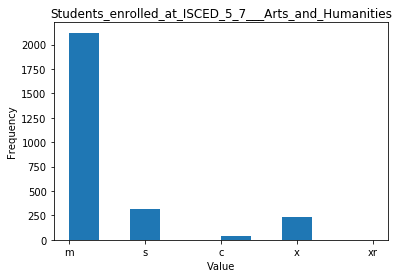

In [13]:
columna='Students_enrolled_at_ISCED_5_7___Arts_and_Humanities'
miss_se57ah=Histogram_Missing(columna,df)
plt.hist(miss_se57ah)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction')

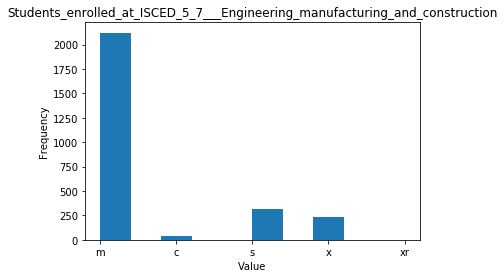

In [14]:
columna= 'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction'
miss_se57emc=Histogram_Missing(columna,df)
plt.hist(miss_se57emc)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Total_students_enrolled_ISCED_5_7')

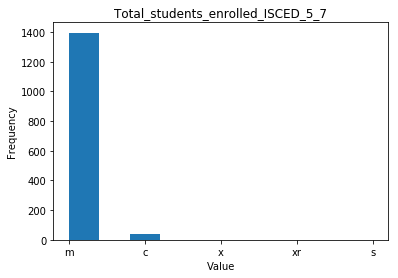

In [15]:
columna= 'Total_students_enrolled_ISCED_5_7'
miss_tse57=Histogram_Missing(columna,df)
plt.hist(miss_tse57)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Graduates_at_ISCED_5_7___men')

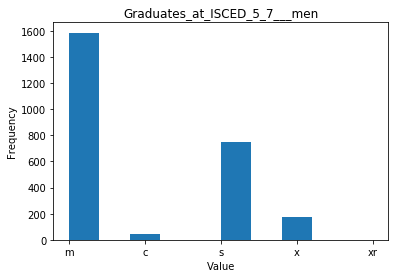

In [16]:
columna= 'Graduates_at_ISCED_5_7___men'
miss_g57m=Histogram_Missing(columna,df)
plt.hist(miss_g57m)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Graduates_at_ISCED_5_7___women')

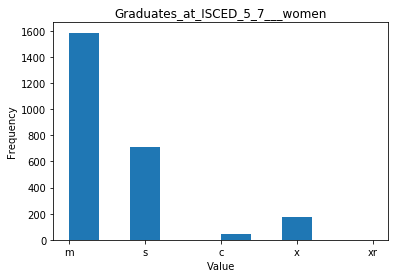

In [17]:
columna=  'Graduates_at_ISCED_5_7___women'
miss_g57w=Histogram_Missing(columna,df)
plt.hist(miss_g57w)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

Text(0.5, 1.0, 'Student_fees_funding___Total_current_revenues')

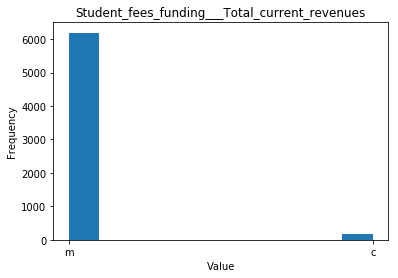

In [18]:
columna= 'Student_fees_funding___Total_current_revenues'
miss_sfftcr=Histogram_Missing(columna,df)
plt.hist(miss_sfftcr)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(columna)

# Useful functions to be used for prediction missing values 

In [19]:
#convert selected columns to numeric
columns_to_convert_numeric = [e for e in col if e not in ('Country_Code', 'Institution_Category_standardized', 'Highest_degree_delivered')]
def numeric(df,columns_to_convert_numeric):
    for i in columns_to_convert_numeric:
        df[i]=pd.to_numeric(df[i],errors='coerce')
    return df

In [20]:
columns_to_convert_numeric

['Foundation_year',
 'Total_academic_staff_HC',
 'Students_enrolled_at_ISCED_5_7___foreigner',
 'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities',
 'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction',
 'Total_students_enrolled_ISCED_5_7',
 'Graduates_at_ISCED_5_7___men',
 'Graduates_at_ISCED_5_7___women',
 'Student_fees_funding___Total_current_revenues',
 'Erasmus_total_incoming_students',
 'Erasmus_total_outgoing_students']

In [59]:
def encoder(df,y):
    # Categorical boolean mask
    categorical_feature_mask = df.dtypes==object
    # filter categorical columns using mask and turn it into a list
    categorical_cols = df.columns[categorical_feature_mask].tolist()

    maps=[]
    for i in categorical_cols:
        le = LabelEncoder()
        df[i]=le.fit_transform(df[i])
        le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        maps.append(le_name_mapping)
    #df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col))

        
    return df,maps

# DATASET PREPARATION FOR TRAINING, VALIDATION AND TEST

In [22]:
#We will select variables that have more than 75% completeness
#For those that have 0.75 <= Completness < 1 we will remove the missing data in order to have 100% completeness


more_75=['Foundation_year','Highest_degree_delivered','Students_enrolled_at_ISCED_5_7___Arts_and_Humanities',
         'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction',
         'Total_students_enrolled_ISCED_5_7',
        'Graduates_at_ISCED_5_7___men',
         'Graduates_at_ISCED_5_7___women']    

def selectFeature(L,df):
    lengths={}
    missing=['a','m','x','xc','xr','c','s','nc','information missing']
    col=['Country_Code',
         'Institution_Category_standardized',
         'Foundation_year',
         'Highest_degree_delivered',
         'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities',
         'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction',
         'Total_students_enrolled_ISCED_5_7',
         'Graduates_at_ISCED_5_7___men',
         'Graduates_at_ISCED_5_7___women',
         'Erasmus_total_incoming_students', 
         'Erasmus_total_outgoing_students']

    for i in col:
        for j in missing:
            df=df.loc[df[i] != j]
        
    df=df.reset_index(drop=True)    
    
    return df

df=selectFeature(len(df),df)

In [23]:
#updated completeness
completeness(len(df),df)

{'Country_Code': 100.0,
 'Institution_Category_standardized': 100.0,
 'Foundation_year': 100.0,
 'Total_academic_staff_HC': 72.69175673915875,
 'Highest_degree_delivered': 100.0,
 'Students_enrolled_at_ISCED_5_7___foreigner': 81.54707644224509,
 'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities': 100.0,
 'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction': 100.0,
 'Total_students_enrolled_ISCED_5_7': 100.0,
 'Graduates_at_ISCED_5_7___men': 100.0,
 'Graduates_at_ISCED_5_7___women': 100.0,
 'Student_fees_funding___Total_current_revenues': 57.41633025133481,
 'Erasmus_total_incoming_students': 100.0,
 'Erasmus_total_outgoing_students': 100.0}

In [24]:
len(df)

7679

In [25]:
#for trainDF: remove the rows that include ['a','m','x','xc','xr','c','s','nc'] in the column that to be predicted. Training set should not include any of them.
#for predictDF: keep only the rows that has ['a','m','x','xc','xr','c','s','nc'] in to be predicted column.

def predictionSeparation(df,target_column):
    missing=['a','m','x','xc','xr','c','s','nc']
    #Create Train Dataframe
    trainDF=df.loc[df[target_column].isin(missing)==False]
    
    #Create Prediction Dataframe

    predictDF=df.loc[df[target_column].isin(missing)]
    return trainDF,predictDF

In [26]:
def createXY(df,y):
    #Separate Features from target
    #y should be the name of the column target we are trying to work with
    col=['Country_Code',
         'Institution_Category_standardized',
         'Foundation_year',
         'Highest_degree_delivered',
         'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities',
         'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction',
         'Total_students_enrolled_ISCED_5_7',
         'Graduates_at_ISCED_5_7___men',
         'Graduates_at_ISCED_5_7___women',
         'Erasmus_total_incoming_students', 
         'Erasmus_total_outgoing_students']
    X = df.filter(col, axis=1)
    Y = list(df[y])
    
    return X,Y

# Regression Models

In [27]:
def LinearRegression1(x_train,x_test,y_train,y_test,x_val):
    print('Linear Regression')
    model=LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    final_pred=model.predict(x_val)
    
    return y_pred,final_pred

def Lasso1(x_train,x_test,y_train,y_test,x_val):
    print("LASSO")
    model=Lasso()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    final_pred=model.predict(x_val)
    
    return y_pred,final_pred

def GBR(x_train,x_test,y_train,y_test,x_val):
    print("Gradient Boosting Regression")
    model=GradientBoostingRegressor()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    final_pred=model.predict(x_val)
    
    return y_pred,final_pred

def XGB(x_train,x_test,y_train,y_test,x_val):
    print("XGB")
    model = XGBRegressor(max_depth=2, learning_rate=0.00018, n_estimators=100000, booster='gblinear',base_score=-4 , reg_lambda=0.007,max_delta_step=9 ,n_jobs=3)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    final_pred=model.predict(x_val)

    return y_pred,final_pred

def Results_regression(y_test,y_pred):
    
    mse=mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test, y_pred)
    rmse=mse**(1/2)
    print ("Mean Squared Error is: ", mse)
    print ("r2 score is:  ", r2)
    print ("rmse score is: ",rmse)
    print ("####################################################")
    return (mse,r2,rmse)





In [61]:
def Predictions(df,y,flag_y):

    trainDF,predictDF=predictionSeparation(df,y)
    
    
    ##Apropriate type

    trainDF_1=numeric(trainDF,columns_to_convert_numeric)
    
    trainDF_,maps_T=encoder(trainDF_1,y)
    
    X,Y = createXY(trainDF_,y)
    ###Encode categorical values
    

    x_train, x_test, y_train, y_test = train_test_split(X.as_matrix(), np.array(Y), test_size = .33,random_state=42)
    print( x_train.shape, y_train.shape)
    print (x_test.shape, y_test.shape)
    
    ##Apropriate type

    predictDF_1=numeric(predictDF,columns_to_convert_numeric)
    
    ###Encode categorical values
    X_p,maps_P=encoder(predictDF_1,y)
    
    X_p_1,Y_p = createXY(X_p,y)

    
    X_p_2=X_p_1.as_matrix()
    
    ##Algorithms
    #Linear Regression

    startL = time.time()      
    y_pred_L,y_final_L=LinearRegression1(x_train,x_test,y_train,y_test,X_p_2) 
    endL = time.time()
    timeL=endL - startL
    print("Linear Regression time is: ", timeL, "seconds")
    msel,r2l,rmsel=Results_regression(y_test,y_pred_L)

    ##Algorithms
    #LASSO

    startLa = time.time()      
    y_pred_La,y_final_Lasso=Lasso1(x_train,x_test,y_train,y_test,X_p_2)
    endLa = time.time()
    timeLa=endLa - startLa
    print("Linear Regression time is: ", timeLa, "seconds")
    msela,r2la,rmsela=Results_regression(y_test,y_pred_La)
    
    ##Algorithms
    #GBR

    startG = time.time()      
    y_pred_GBR,y_final_GBR=GBR(x_train,x_test,y_train,y_test,X_p_2)
    endG = time.time()
    timeG=endG - startG
    print("GBR time is: ", timeG, "seconds")
    mseGBR,r2GBR,rmseGBR=Results_regression(y_test,y_pred_GBR)
    
    ##Algorithms
    #XGB

    startX = time.time()      
    y_pred_XGB,y_final_XGB=XGB(x_train,x_test,y_train,y_test,X_p_2)
    endX = time.time()
    timeX=endX - startX
    print("XGB time is: ", timeX, "seconds")
    mseXGB,r2XGB,rmseXGB=Results_regression(y_test,y_pred_XGB)

    
    MSE=[msel,msela,mseGBR]
    R2=[r2l,r2la,r2GBR]
    RMSE=[rmsel,rmsela,rmseGBR]
    PREDICTIONS=[y_final_L,y_final_Lasso,y_final_GBR]

    
    #Decode Training
    Tmap_countries=maps_T[0]
    Tmap_category=maps_T[1]
    Tmap_degree=maps_T[2]
    
    Tres_countries = dict((v,k) for k,v in Tmap_countries.items())
    Tres_category = dict((v,k) for k,v in Tmap_category.items())
    Tres_degree = dict((v,k) for k,v in Tmap_degree.items())
    
    ##Countries
    TL_countries=list(trainDF_['Country_Code'])
    TL_countries_=[]
    
    for i in TL_countries:
        TL_countries_.append(Tres_countries[i])
    
    ##Category
    TL_category=list(trainDF_['Institution_Category_standardized'])
    TL_category_=[]

    for i in TL_category:
        TL_category_.append(Tres_category[i])
    
    ##Degree
    TL_degree=list(trainDF_['Highest_degree_delivered'])
    TL_degree_=[]

    for i in TL_degree:
        TL_degree_.append(Tres_degree[i])
    
    
    ##Replace values
    trainDF_.Country_Code=TL_countries_
    trainDF_.Institution_Category_standardized=TL_category_
    trainDF_.Highest_degree_delivered=TL_degree_
    
    
    
    
    
    
    #Decode Prediction
    Pmap_countries=maps_P[0]
    Pmap_category=maps_P[1]
    Pmap_degree=maps_P[2]
    
    Pres_countries = dict((v,k) for k,v in Pmap_countries.items())
    Pres_category = dict((v,k) for k,v in Pmap_category.items())
    Pres_degree = dict((v,k) for k,v in Pmap_degree.items())
    
    ##Countries
    PL_countries=list(X_p['Country_Code'])
    PL_countries_=[]
    
    for i in PL_countries:
        PL_countries_.append(Pres_countries[i])
    
    ##Category
    PL_category=list(X_p['Institution_Category_standardized'])
    PL_category_=[]

    for i in PL_category:
        PL_category_.append(Pres_category[i])
    
    ##Degree
    PL_degree=list(X_p['Highest_degree_delivered'])
    PL_degree_=[]

    for i in PL_degree:
        PL_degree_.append(Pres_degree[i])
    
    
    ##Replace values
    X_p.Country_Code=PL_countries_
    X_p.Institution_Category_standardized=PL_category_
    X_p.Highest_degree_delivered=PL_degree_
    
    return MSE,R2,RMSE,PREDICTIONS,trainDF_,X_p

In [62]:
###Target columns to be predict
targets=['Total_academic_staff_HC',
         'Students_enrolled_at_ISCED_5_7___foreigner',
         'Student_fees_funding___Total_current_revenues']

### Predict missing values in 'Total_academic_staff_HC'

In [63]:
le = LabelEncoder()

In [64]:
MSEStaff,R2Staff,RMSEStaff,PREDICTIONSStaff,Training_Staff,Validation_Staff=Predictions(df,targets[0],True)

(3739, 11) (3739,)
(1843, 11) (1843,)
Linear Regression
Linear Regression time is:  0.0029535293579101562 seconds
Mean Squared Error is:  888617.1766804036
r2 score is:   0.5686515314201426
rmse score is:  942.6649334097475
####################################################
LASSO
Linear Regression time is:  0.018033266067504883 seconds
Mean Squared Error is:  888598.9375397876
r2 score is:   0.56866038498001
rmse score is:  942.6552591163896
####################################################
Gradient Boosting Regression
GBR time is:  0.5148758888244629 seconds
Mean Squared Error is:  341634.5228090994
r2 score is:   0.8341653390290974
rmse score is:  584.4951007571401
####################################################


In [67]:
Validation_Staff.Total_academic_staff_HC=list(PREDICTIONSStaff[2])

In [68]:
df_with_T1=Training_Staff.append(Validation_Staff, ignore_index=True)

### Predict missing values in 'Students_enrolled_at_ISCED_5_7___foreigner'

In [69]:
MSEForeigner,R2Foreigner,RMSEForeigner,PREDICTIONSForeigner,Training_Foreigner,Validation_Foreigner=Predictions(df,targets[1],False)

(4195, 11) (4195,)
(2067, 11) (2067,)
Linear Regression
Linear Regression time is:  0.003969907760620117 seconds
Mean Squared Error is:  1256212.0967369834
r2 score is:   0.5903643346261109
rmse score is:  1120.8086798097984
####################################################
LASSO
Linear Regression time is:  0.01807093620300293 seconds
Mean Squared Error is:  1256388.1717906226
r2 score is:   0.5903069186674996
rmse score is:  1120.887225277647
####################################################
Gradient Boosting Regression
GBR time is:  0.5001535415649414 seconds
Mean Squared Error is:  488896.64276453987
r2 score is:   0.8405766812164015
rmse score is:  699.2114435308821
####################################################


In [70]:
Validation_Foreigner.Students_enrolled_at_ISCED_5_7___foreigner=list(PREDICTIONSForeigner[2])

In [71]:
df_with_T2=Training_Foreigner.append(Validation_Foreigner, ignore_index=True)

In [72]:
df_with_T1.head()

,Country_Code,Institution_Category_standardized,Foundation_year,Total_academic_staff_HC,Highest_degree_delivered,Students_enrolled_at_ISCED_5_7___foreigner,Students_enrolled_at_ISCED_5_7___Arts_and_Humanities,Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction,Total_students_enrolled_ISCED_5_7,Graduates_at_ISCED_5_7___men,Graduates_at_ISCED_5_7___women,Student_fees_funding___Total_current_revenues,Erasmus_total_incoming_students,Erasmus_total_outgoing_students
0,AT,university,1365,6765.0,ISCED 8,20312.481380,20060.414720,20.000000,77825.42845,2976.666667,6757.163842,NaN,1165,1299
1,AT,university,1585,3023.0,ISCED 8,2775.338073,4287.694963,74.201149,24714.41889,988.833333,2177.341808,NaN,491,488
2,AT,university,1669,3206.0,ISCED 8,9691.604128,3029.091586,2174.578167,24622.59977,1668.500000,2057.516949,NaN,252,464
3,AT,university,1622,1946.0,ISCED 8,5030.075841,1841.370320,174.000765,14335.06615,727.500000,1396.250000,NaN,266,207
4,AT,university,1872,3675.0,ISCED 8,6384.621234,0.000000,15400.753720,23617.53548,2008.000000,861.737288,NaN,486,272


In [73]:
df_with_T2.head()

,Country_Code,Institution_Category_standardized,Foundation_year,Total_academic_staff_HC,Highest_degree_delivered,Students_enrolled_at_ISCED_5_7___foreigner,Students_enrolled_at_ISCED_5_7___Arts_and_Humanities,Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction,Total_students_enrolled_ISCED_5_7,Graduates_at_ISCED_5_7___men,Graduates_at_ISCED_5_7___women,Student_fees_funding___Total_current_revenues,Erasmus_total_incoming_students,Erasmus_total_outgoing_students
0,AT,university,1365,6765.0,ISCED 8,20312.481380,20060.414720,20.000000,77825.42845,2976.666667,6757.163842,NaN,1165,1299
1,AT,university,1585,3023.0,ISCED 8,2775.338073,4287.694963,74.201149,24714.41889,988.833333,2177.341808,NaN,491,488
2,AT,university,1669,3206.0,ISCED 8,9691.604128,3029.091586,2174.578167,24622.59977,1668.500000,2057.516949,NaN,252,464
3,AT,university,1622,1946.0,ISCED 8,5030.075841,1841.370320,174.000765,14335.06615,727.500000,1396.250000,NaN,266,207
4,AT,university,1872,3675.0,ISCED 8,6384.621234,0.000000,15400.753720,23617.53548,2008.000000,861.737288,NaN,486,272


### Predict missing values in 'Student_fees_funding___Total_current_revenues'

In [74]:
MSEFees,R2Fees,RMSEFees,PREDICTIONSFees,Training_Fees,Validation_Fees=Predictions(df,targets[2],False)

(2954, 11) (2954,)
(1455, 11) (1455,)
Linear Regression
Linear Regression time is:  0.0029478073120117188 seconds
Mean Squared Error is:  0.055917665552718224
r2 score is:   0.15815939169288207
rmse score is:  0.23646916406313578
####################################################
LASSO
Linear Regression time is:  0.004082918167114258 seconds
Mean Squared Error is:  0.060443974612368424
r2 score is:   0.09001579638185231
rmse score is:  0.24585356335096797
####################################################
Gradient Boosting Regression
GBR time is:  0.3525519371032715 seconds
Mean Squared Error is:  0.021906624010902605
r2 score is:   0.6701957154147133
rmse score is:  0.148008864636219
####################################################


In [75]:
Validation_Fees.Student_fees_funding___Total_current_revenues=list(PREDICTIONSFees[2])

In [76]:
df_with_T3=Training_Fees.append(Validation_Fees, ignore_index=True)

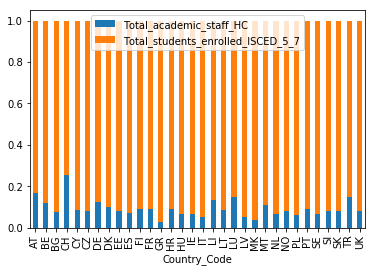

In [117]:
#Academic staff/student ratio based on country
labels =list(df_with_T1['Country_Code'])
A_H=list(df_with_T1['Total_academic_staff_HC'])
E_M_C=list(df_with_T1['Total_students_enrolled_ISCED_5_7'])
df_query5 = pd.DataFrame({'Country_Code':labels,'Total_academic_staff_HC':A_H,'Total_students_enrolled_ISCED_5_7':E_M_C})
df_query5=df_query5.groupby(['Country_Code']).sum()

df_query5copy=df_query5.copy()
for i in range(len(df_query5)):
    df_query5['Total_academic_staff_HC'][i]=df_query5copy.iloc[i][0]/sum(list(df_query5copy.iloc[i]))
    df_query5['Total_students_enrolled_ISCED_5_7'][i]=df_query5copy.iloc[i][1]/sum(list(df_query5copy.iloc[i]))
df_query5.plot(kind='bar', stacked=True)

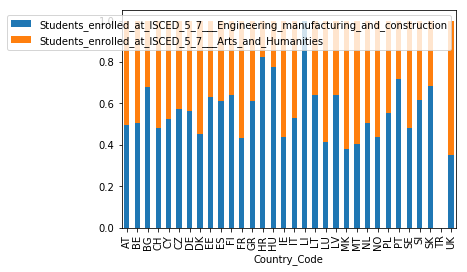

In [112]:
#Compare art and humanities and engineering construction based on country in ISCED 7
labels =list(df_with_T1['Country_Code'])
A_H=list(df_with_T1['Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction'])
E_M_C=list(df_with_T1['Students_enrolled_at_ISCED_5_7___Arts_and_Humanities'])
df_query5 = pd.DataFrame({'Country_Code':labels,'Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction':A_H,'Students_enrolled_at_ISCED_5_7___Arts_and_Humanities':E_M_C})
df_query5=df_query5.groupby(['Country_Code']).sum()

df_query5copy=df_query5.copy()
for i in range(len(df_query5)):
    df_query5['Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction'][i]=df_query5copy.iloc[i][0]/sum(list(df_query5copy.iloc[i]))
    df_query5['Students_enrolled_at_ISCED_5_7___Arts_and_Humanities'][i]=df_query5copy.iloc[i][1]/sum(list(df_query5copy.iloc[i]))

df_query5.plot(kind='bar', stacked=True)

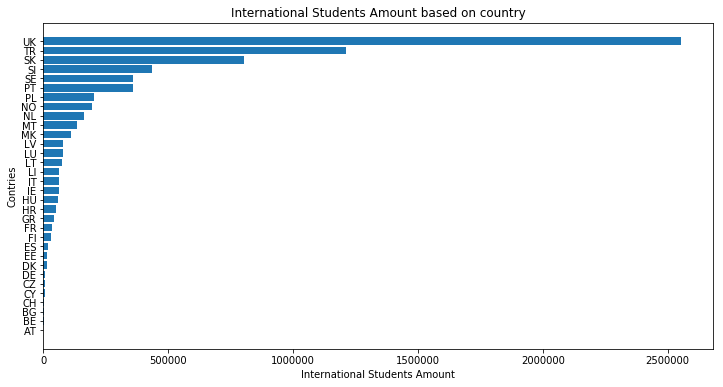

In [83]:
#Check international students amount based on country
L1=list(df_with_T2['Country_Code'])
L1_=[]

# for i in L1:
#     L1_.append(res_countries[i])
        
        
L2=list(df_with_T2['Students_enrolled_at_ISCED_5_7___foreigner'])

#norm_L2 = [float(i)/sum(L2) for i in L2]


df_query2 = pd.DataFrame({'Country_Code':L1, 'International students amount':L2})
df_query2=df_query2.groupby(['Country_Code']).sum()
df_query2.reset_index(level=0, inplace=True)


y_pos = np.arange(len(tuple(list(df_query2['Country_Code']))))
plt.figure(figsize=(12,6))
# Create horizontal bars
plt.barh(y_pos, sorted(list(df_query2['International students amount'])))
# Create names on the y-axis
plt.yticks(y_pos, tuple(list(df_query2['Country_Code'])))
plt.ylabel('Contries')
plt.xlabel('International Students Amount')
plt.title('International Students Amount based on country')
plt.show()

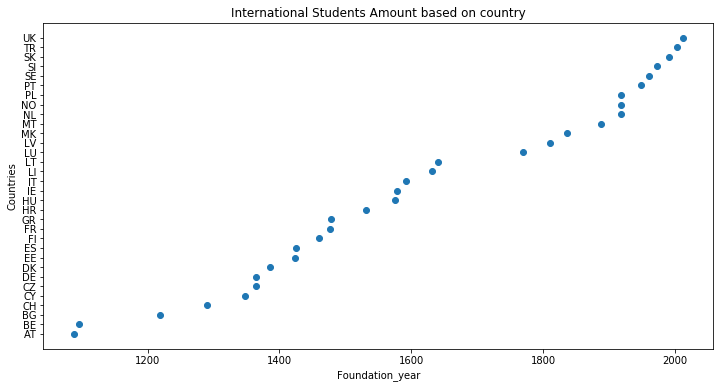

In [122]:
#Check international students amount based on country
L1=list(df_with_T2['Country_Code'])
L1_=[]

# for i in L1:
#     L1_.append(res_countries[i])
        
        
L2=list(df_with_T2['Foundation_year'])

#norm_L2 = [float(i)/sum(L2) for i in L2]


df_query2 = pd.DataFrame({'Country_Code':L1, 'Foundation_year':L2})
df_query2=df_query2.groupby(['Country_Code']).min()
df_query2.reset_index(level=0, inplace=True)


y_pos = np.arange(len(tuple(list(df_query2['Country_Code']))))
plt.figure(figsize=(12,6))
# Create horizontal bars
plt.scatter(sorted(list(df_query2['Foundation_year'])),y_pos)
# Create names on the y-axis
plt.yticks(y_pos, tuple(list(df_query2['Country_Code'])))
plt.ylabel('Countries')
plt.xlabel('Foundation_year')
plt.title('International Students Amount based on country')
plt.show()

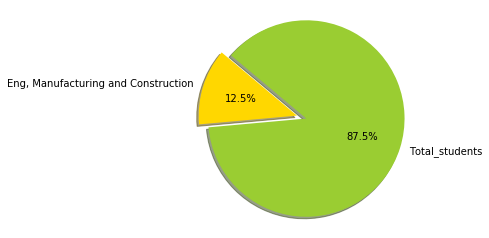

In [123]:
#Students enrolled in Engineering in ISCED 5-7 Vs. Total students
df_with_T1['Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction']
df_with_T1['Total_students_enrolled_ISCED_5_7']

# Data to plot
labels = ['Eng, Manufacturing and Construction', 'Total_students']
sizes = [sum(list(df_with_T1['Students_enrolled_at_ISCED_5_7___Engineering_manufacturing_and_construction'])),sum(list(df_with_T1['Total_students_enrolled_ISCED_5_7']))]
#colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [129]:
#Highest degree delivered based on Institution category

from collections import Counter 

ICS=list(df_with_T1['Institution_Category_standardized'])
HDD=list(df_with_T1['Highest_degree_delivered'])
df_query6=pd.DataFrame({'Institution_Category_standardized':ICS,'Highest_degree_delivered':HDD})

university_df=df_query6[df_query6['Institution_Category_standardized']=='university']
other_df=df_query6[df_query6['Institution_Category_standardized']=='other']
applied_sciences_df=df_query6[df_query6['Institution_Category_standardized']=='university of applied sciences']


U=Counter(list(university_df['Highest_degree_delivered']))
O=Counter(list(other_df['Highest_degree_delivered']))
AP=Counter(list(applied_sciences_df['Highest_degree_delivered']))

print('university:',U)
print('other:',O)
print('university of applied sciences:',AP)

university: Counter({'ISCED 8': 3603, 'ISCED 7': 188, 'ISCED 6': 2})
other: Counter({'ISCED 7': 1404, 'ISCED 8': 395, 'ISCED 6': 323})
university of applied sciences: Counter({'ISCED 7': 1258, 'ISCED 6': 275, 'ISCED 8': 163, 'ISCED 5': 68})


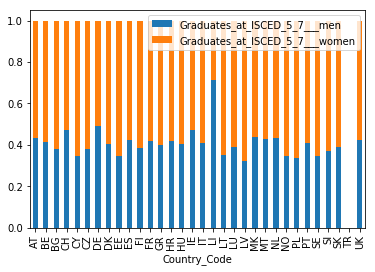

In [115]:
#Compare Men to Women ratio or Gender equality based on each country
labels =list(df_with_T1['Country_Code'])
A_H=list(df_with_T1['Graduates_at_ISCED_5_7___men'])
E_M_C=list(df_with_T1['Graduates_at_ISCED_5_7___women'])
df_query5 = pd.DataFrame({'Country_Code':labels,'Graduates_at_ISCED_5_7___men':A_H,'Graduates_at_ISCED_5_7___women':E_M_C})
df_query5=df_query5.groupby(['Country_Code']).sum()

df_query5copy=df_query5.copy()
for i in range(len(df_query5)):
    df_query5['Graduates_at_ISCED_5_7___men'][i]=df_query5copy.iloc[i][0]/sum(list(df_query5copy.iloc[i]))
    df_query5['Graduates_at_ISCED_5_7___women'][i]=df_query5copy.iloc[i][1]/sum(list(df_query5copy.iloc[i]))

df_query5.plot(kind='bar', stacked=True)

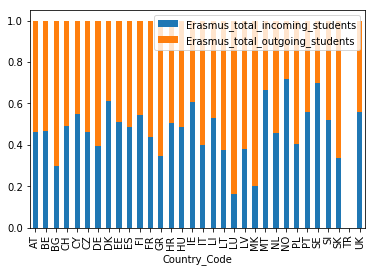

In [126]:
# Comparative study to understand the incoming and outgoing transfer students based on country
labels =list(df_with_T1['Country_Code'])
A_H=list(df_with_T1['Erasmus_total_incoming_students'])
E_M_C=list(df_with_T1['Erasmus_total_outgoing_students'])
df_query5 = pd.DataFrame({'Country_Code':labels,'Erasmus_total_incoming_students':[float(i) for i in A_H],'Erasmus_total_outgoing_students':[float(i) for i in E_M_C]})
df_query5=df_query5.groupby(['Country_Code']).sum()
df_query5copy=df_query5.copy()
for i in range(len(df_query5)):
    df_query5['Erasmus_total_incoming_students'][i]=df_query5copy.iloc[i][0]/sum(list(df_query5copy.iloc[i]))
    df_query5['Erasmus_total_outgoing_students'][i]=df_query5copy.iloc[i][1]/sum(list(df_query5copy.iloc[i]))
df_query5.plot(kind='bar', stacked=True)

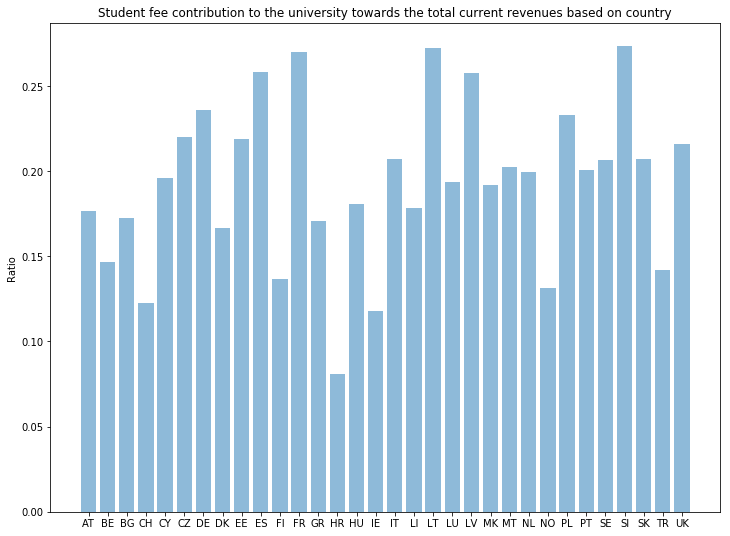

In [128]:
#Student fee contribution to the university towards the total current revenues based on country

labels =list(df_with_T1['Country_Code'])
A_H=list(df_with_T3['Student_fees_funding___Total_current_revenues'])
df_query5 = pd.DataFrame({'Country_Code':labels,'Student_fees_funding___Total_current_revenues': A_H})
df_query5=df_query5.groupby(['Country_Code']).mean()
objects = tuple(df_query5.index)
y_pos = np.arange(len(objects))
performance = list(df_query5['Student_fees_funding___Total_current_revenues'])
plt.figure(figsize=(12,9))
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Ratio')
plt.title('Student fee contribution to the university towards the total current revenues based on country')

plt.show()